In [394]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

The machine learning algorithms and systems that seemed of interest for the project are genetic algorithms and artificial neural networks. So basic examples of them were first copied and pasted and, after some study of the topic, they were understood, customized and documented.

## Genetic algorithm: getting a numerical password

Genetic algorithms evolve until they reached one specific value, which is the correct password. This may be achieved from the 'time' it takes to return that a password has failed (real life approximation), so the number of correct values is known, although the ones that are correct are unkwon (coded up this way). The code will depend on a string of positive numbers, bounded each one from 0 to 9.

#### Chart flow of a genetic algorithm

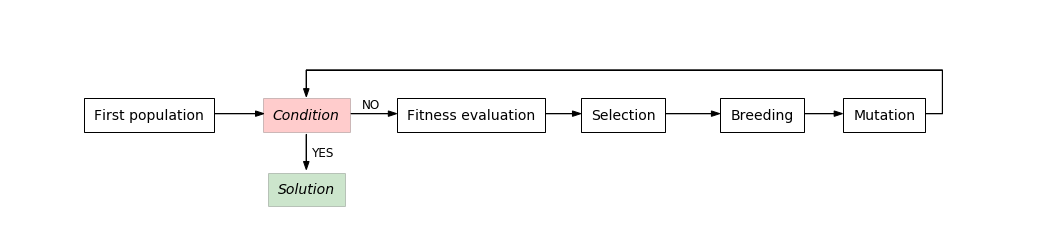

In [541]:
fig, ax = plt.subplots(1, figsize=(18,4))
ax.axis('off')
ax.set_ylim([-1,3])
ax.set_xlim([0,18])
ax.text(1, 1, 'First population', fontsize = 14, bbox = {'facecolor':'white', 'pad':10})
ax.arrow(2.6,1.1,1.29,0.0,fc='k',head_width=0.1)
ax.text(4.2, 1, 'Condition', style='italic', fontsize = 14, bbox = {'facecolor':'red', 'alpha':0.2, 'pad':10})
ax.arrow(5.6,1.1,0.67,0.0,fc='k',head_width=0.1)
ax.text(5.8, 1.2, 'NO', fontsize = 12)
ax.text(6.6, 1, 'Fitness evaluation', fontsize = 14, bbox = {'facecolor':'white', 'pad':10})
ax.arrow(9.0,1.1,0.57,0.0,fc='k',head_width=0.1)
ax.text(9.9, 1, 'Selection', fontsize = 14, bbox = {'facecolor':'white', 'pad':10})
ax.arrow(11.1,1.1,0.96,0.0,fc='k',head_width=0.1)
ax.text(12.4, 1, 'Breeding', fontsize = 14, bbox = {'facecolor':'white', 'pad':10})
ax.arrow(13.1,1.1,1.16,0.0,fc='k',head_width=0.1)
ax.text(14.6, 1, 'Mutation', fontsize = 14, bbox = {'facecolor':'white', 'pad':10})
ax.arrow(15.7,1.1,0.5,0.0)
ax.arrow(16.2,1.1,0.0,0.8)
ax.arrow(16.2,1.9,-11.4,0.0)
ax.arrow(4.8,1.9,0.0,-0.34,fc='k',head_width=0.1)
ax.arrow(4.8,0.72,0.0,-0.5,fc='k',head_width=0.1)
ax.text(4.3, -0.37, 'Solution', style='italic', fontsize = 14, bbox = {'facecolor':'green', 'alpha':0.2, 'pad':10})
ax.text(4.9, 0.32, 'YES', fontsize = 12);

In [535]:
0.47-0.5

-0.030000000000000027

### First population

In [3]:
def first_gen(N, Nind): 
    # generate the first generation from random numbers
    
    # define a list for all the generation
    gen0 = []
    
    # append Nind of length N to the population
    for i in range(Nind):
        gen0.append(np.random.randint(0, 10, N))

    # return the list with the individuals
    return gen0

### Fitness evaluation

In [2]:
def fitness(trueCode, generation): 
    # compare digit by digit and get the number of the ones that are correct
    
    # fitness list
    fit = []
    
    # loop over the whole generation
    for i in range(len(generation)):
        # substract the values, the ones that are not zero (False) will be the differents
        fitness = np.sum((trueCode- generation[i]) != 0)
        # return the values that are correct 
        fit.append(len(trueCode) - fitness)

    return fit

### Selection

In [4]:
def selection(generation, fitness): 
    # select the individuals with fitness values above the mean

    # create an empty list for the intermediate population
    intPop = []
    
    # fill the list with the individuals that have fitness values above the mean
    for i in range(len(fitness)):
        if fitness[i] > np.mean(np.array(fitness)):
            intPop.append(generation[i])
    
    # return the intermediate population
    return intPop

### Breeding

In [5]:
def breeding(newPopSize, intermediatePopulation): 
    # breed the intermediate population

    # create a list for the new population
    newPop = []
    
    # loop over the size of the new population size
    for i in range(newPopSize):
        # pick two random parents from intermediatePopulation
        ind0 = int(np.random.choice(np.linspace(0,len(intermediatePopulation)-1,len(intermediatePopulation))))
        ind1 = int(np.random.choice(np.linspace(0,len(intermediatePopulation)-1,len(intermediatePopulation))))
        while ind0 == ind1:
            ind1 = int(np.random.choice(np.linspace(0,len(intermediatePopulation)-1,len(intermediatePopulation))))
        # select the crossover point randomly
        crssPt = np.random.randint(0,len(intermediatePopulation[0]))
        # take [:crssPt] from first individual and [crssPt:] from the second to get the new individual        
        newPop.append(np.concatenate((intermediatePopulation[ind0][:crssPt],intermediatePopulation[ind1][crssPt:])))
    
    return newPop

### Mutation

In [6]:
def mutation(newGeneration, currentGenIter, totalGenIter): 
    # mutate the new generation with a descending probability as generation evolves
    
    # for the first half of the algorithm, mutation probability will be
    if currentGenIter < totalGenIter/2 :
        p = 0.5*(totalGenIter - currentGenIter)/(totalGenIter)
    # for the second half of the iterations, probability will be fixed
    else:
        p = 0.2
    
    # create a list for the mutated generation
    mutatedGen = []
    
    # loop over the population
    for i in range(len(newGeneration)):
        # if the probability is below the limit
        if np.random.rand() < p:
            # create an empty deviation array
            deviation = np.zeros(len(newGeneration[0]))
            # add a random +1 or -1 in a random location
            deviation[np.random.randint(0,len(newGeneration[0])-1)] = np.random.choice([1,-1])
            # add this deviation to the individial
            mutatedGen.append(newGeneration[i] + (deviation).astype(int))
                           
        # otherwise keep the individual as it was
        else:
            # add the non-mutated individual
            mutatedGen.append(newGeneration[i])

        # corret numbers above 9 and below 0 to the range [0,9]
        if np.any(np.zeros(len(mutatedGen[i])) > mutatedGen[i]) or np.any(9*np.ones(len(mutatedGen[i])) < mutatedGen[i]):
            # with a random number in the interval
            mutatedGen[i][np.zeros(len(mutatedGen[i])) > mutatedGen[i]] = np.random.randint(0,10)
            mutatedGen[i][9*np.ones(len(mutatedGen[i])) < mutatedGen[i]] = np.random.randint(0,10)
            
    return mutatedGen

### Looping in the algorithm

In [7]:
# true code to find
code = [5,4,1,2,1,3,5,9,8,0]

# find parameters of the algorithm
Nind = 50
Ngen = 250

In [8]:
# create a list to store the generation lists with the arrays inside
gen = []

# create the list to store the fitness value
fitList = []

# store the first generation in the generations list
gen.append(first_gen(len(code), Nind))

In [9]:
# loop over all generations
for i in range(Ngen):
    # fitness calculation
    fitList.append(fitness(code, gen[i]))
    # intermediate generation
    selectedGen = selection(gen[i], fitList[i])
    # breeding of the population
    bredGen = breeding(Nind, selectedGen)
    # mutation of the generation
    mutGen = mutation(bredGen, i, Ngen)
    # storage of the new generation
    gen.append(mutGen)

[None, None]

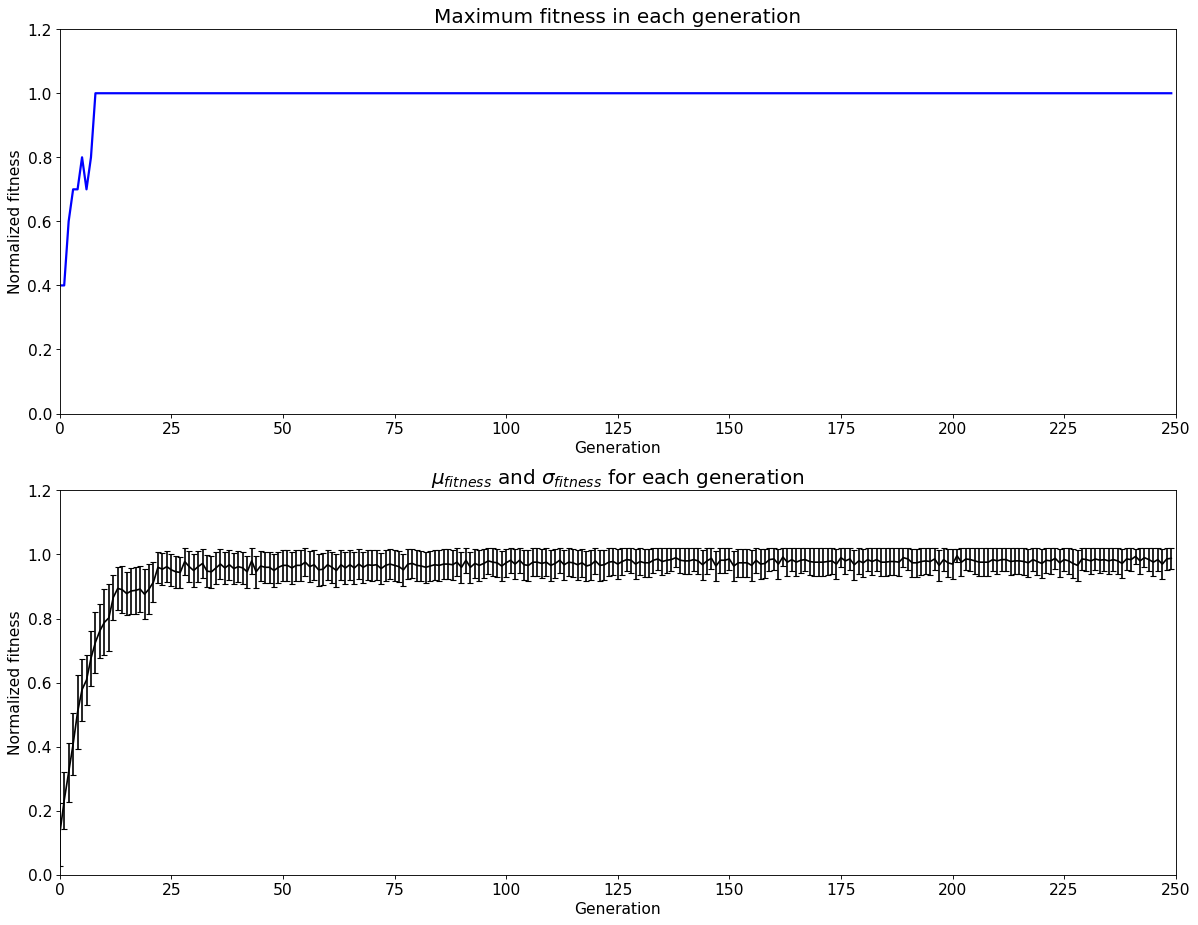

In [10]:
# compute the maximum fitness of each generation
yMax = np.array([np.max(fitList[i]) for i in range(Ngen)])/len(code)
# compute the mean of fitness of each generation
yMean = np.array([np.mean(fitList[i]) for i in range(Ngen)])/len(code)
# compute the standard deviation of fitness of each generation
yStd = np.array([np.std(fitList[i]) for i in range(Ngen)])/len(code)

# plot the results
fig, ax = plt.subplots(2,figsize=(18,14), dpi = 80)
ax[0].plot(np.linspace(0,Ngen-1,Ngen), yMax, 'b-', lw=2)
ax[1].errorbar(np.linspace(0,Ngen-1,Ngen),yMean,yStd,capsize=3, color='k')
[ax[i].set_ylim([0,1.2]) for i in range(2)]
[ax[i].set_xlim([0,Ngen]) for i in range(2)]
[ax[i].set_ylabel('Normalized fitness',fontsize = 14) for i in range(2)]
[ax[i].set_xlabel('Generation',fontsize = 14) for i in range(2)]
[ax[i].set_xticks(np.arange(0,275,25)) for i in range(2)]
ax[0].set_title('Maximum fitness in each generation', fontsize=18)
ax[1].set_title(r'$\mu_{fitness}$ and $\sigma_{fitness}$ for each generation', fontsize=18)
[ax[i].tick_params(axis='both', which='major', labelsize=14) for i in range(2)]

## Artificial neural networks: computing square roots
The next example is a very simple neural network, trained with backpropigation to compute square roots.

In [344]:
# neurons per layer
n = 3

# layer of the network
l = 3

# learning rate
alpha = 0.001

In [345]:
def neuralNetwork(_input, weights, bias):
    # preallocate neuron space
    neuron = np.zeros(bias.shape)

    # input layer -> hidden layer
    neuron[:,0] = weights[0] * _input + bias[:,0]

    # hidden layers
    for i in range(1,l):
        neuron[:,i] = np.sum(weights[i].T * neuron[:,i-1], axis = 1) + bias[:,i]

    # hidden layers -> output layer
    _output = np.sum(weights[-1] * neuron[:,-1])
    
    return _output, neuron

In [346]:
def backpropigation(_input, _desiredOutput, _output, neuron, weights, bias, alpha):
    # delta error of the output
    delta0 = _desiredOutput - _output

    # preallocate space for the delta error of each neuron
    deltah = np.zeros(neuron.shape)

    # delta errors in the hidden -> output layer
    deltah[:,-1] = weights[-1]*delta0

    # delta errors in the hidden layers
    for i in range(2,l+1):
        deltah[:,-i] = np.sum(weights[l+1-i] * deltah[:,-i+1], axis = 1)

    # backpropigation for the bias
    bias += alpha * deltah
    
    # backward pass: output layer weights
    weights[-1] += alpha * delta0 * neuron[:,-1]

    # backward propigation error for hidden layers
    for i in range(2,l+1):
        weights[-i] += np.vstack([alpha * deltah[:,-i+1] * neuron[j,-i] for j in range(len(neuron[:,-1]))])

    # backpropigation for the input layer
    weights[0] += alpha * deltah[:,0] * _input

    # error of the epoch
    Ep = 0.5*delta0**2
    return weights, bias, Ep

In [347]:
# create a lits for the weights
weights = []

# append weights for the input -> hidden layer
weights.append(0.01*np.random.rand(n))

# append weights for the hidden layer [i] -> hidden layer [j]
for i in range(1,l):
    weights.append(0.01*np.random.rand(n,n))

# append weights for the hidden -> output layer
weights.append(0.01*np.random.rand(n))

# create a bias array
bias = 0.01*np.random.rand(n,l)

In [348]:
trainingSet = [25,36,81,100]

errorEpoch = [[] for x in range(len(trainingSet))]

for _input in 1000*trainingSet:
    _output, neuron = neuralNetwork(_input, weights, bias)
    weights, bias, Ep = backpropigation(_input, np.sqrt(_input), _output, neuron, weights, bias,alpha)
    if _input == 25:
        errorEpoch[0].append(Ep)
    if _input == 36:
        errorEpoch[1].append(Ep)
    if _input == 81:
        errorEpoch[2].append(Ep)
    if _input == 100:
        errorEpoch[3].append(Ep)

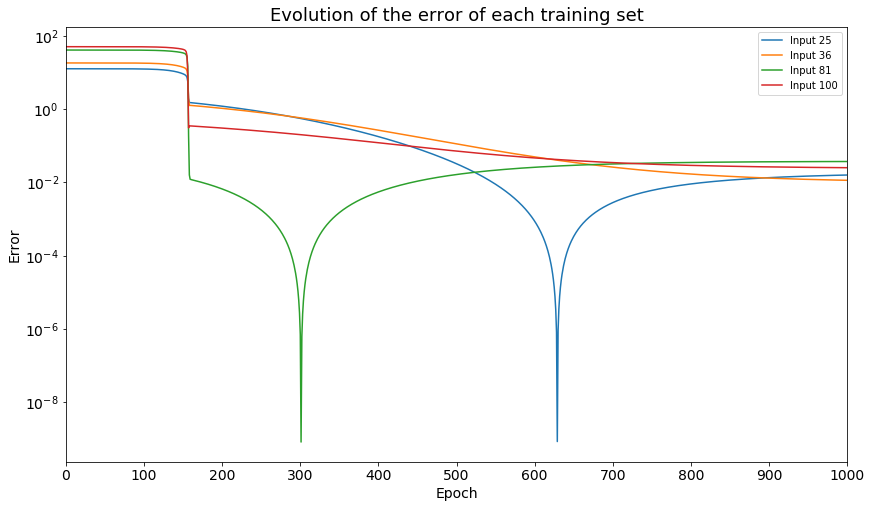

In [393]:
fig, ax = plt.subplots(1, figsize=(14,8))
[ax.semilogy(errorEpoch[i], label='Input %i' %trainingSet[i]) for i in range(len(errorEpoch))]
ax.legend()
ax.set_xlim([0,1000])
ax.set_ylabel('Error',fontsize = 14)
ax.set_xlabel('Epoch',fontsize = 14)
ax.set_xticks(np.arange(0,1100,100))
ax.set_title('Evolution of the error of each training set', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)

In [355]:
#Class to create an HTML table with some data - taken from Yves Dubief
class ListTable(list):
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            for col in row:
                html.append("<td>{0}</td>".format(col))
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

In [376]:
# creation of a table to show up some examples
table = ListTable()
table.append(['<b>Input</b>', '<b>Neural network</b>', r'<b>True value (<tt>sqrt</tt>)</b>', '<b> Relative error <b>'])
for i in [9,16,26,37,45,54,63,72,85,99,121,144,169,196,225,256,289]:
    if min(trainingSet) < i < max(trainingSet):
        table.append(['<b>%i</b>' %i, '%.4f' %neuralNetwork(i, weights, bias)[0], '%.4f' %np.sqrt(i), 
                  '<b>%.4f</b>' %(100*np.abs(neuralNetwork(i, weights, bias)[0]-np.sqrt(i))/np.sqrt(i))])        
    else:
        table.append(['%i' %i, '%.4f' %neuralNetwork(i, weights, bias)[0], '%.4f' %np.sqrt(i), 
                  '%.4f' %(100*np.abs(neuralNetwork(i, weights, bias)[0]-np.sqrt(i))/np.sqrt(i))])
table

Input,Neural network,True value (sqrt),Relative error
9,4.1653,3.0000,38.8436
16,4.6081,4.0000,15.2026
26,5.2407,5.0990,2.7780
37,5.9365,6.0828,2.4047
45,6.4425,6.7082,3.9602
54,7.0119,7.3485,4.5807
63,7.5812,7.9373,4.4863
72,8.1505,8.4853,3.9457
85,8.9728,9.2195,2.6762
99,9.8584,9.9499,0.9193
